# 2차원 벡터

# 평면의 각과 삼각법

## 파이썬에서의 라디안(Radians) 과 삼각형

라디안과 각도(degree)

In [ ]:
from math import tan
tan(45)

1.6197751905438615

```tan()``` 함수를 이용하기 위해선 라디안 값으로 넣어야 한다.

In [25]:
from math import tan, pi
tan(pi/4) 

0.9999999999999999

극 좌표계에서 데카르트 좌표계로의 변환 함수를 작성하자.

In [6]:
from math import sin, cos
def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    #return (?, ?)
    return (length*cos(angle), length*sin(angle))

In [ ]:
# 극 좌표계 5, 37도의 데카르트 좌표계를 구해보자.
angle= ??
to_cartesian( (5, angle) )

(3.993177550236464, 3.0090751157602416)

## 데카르트 좌표계에서 극 좌표계로 변환하기

삼각함수와 역삼각함수

In [5]:
from math import sin, asin
sin(1)

0.8414709848078965

In [6]:
asin(0.8414709848078965)

1.0

sin = 3/sqrt(13)에 해당하는 각도를 찾아보자.

In [ ]:
from math import sqrt
asin(3/sqrt(13))

0.9827937232473292

In [14]:
from math import acos
acos(-2/sqrt(13))

2.1587989303424644

In [7]:
from math import atan2
atan2(3,-2)

2.158798930342464

In [10]:
# length 함수 정의
def length(v):
    return sqrt(v[0]**2 + v[1]**2) 

데카르트 좌표계에서 극 좌표계로 변경하는 함수 ```to_polar(vector)``` 를 작성해보자.

In [8]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y, x)
    return (length(vector), angle)

In [22]:
to_polar((1,0))

(1.0, 0.0)

In [23]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

![fig](https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/image/fig_2.26.PNG)

**EXERCISE:** 그림처럼 데카르트 좌표계로 표현된 (-1.34,2.68) 벡터의 길이가 대략 3이라는 것을 확인하시오.

In [ ]:
?

2.9963310898497184

**EXERCISE:** $116.57^\circ$ 는 몇 라디안(radians) 인가? 서로 변환하는 함수를 작성하라. 참고: $116.57^\circ · (1 \text{rad} / 57.296^\circ) = 2.035 \text{rad}.$

In [2]:
from math import pi

def degree_to_radian(degree):
    return degree * pi / 180
    #pass

def radian_to_degree(radian):
    return radian * 180 / pi
    #pass

degree_to_radian(116.57)

2.03453030904979

**EXERCISE:** 각도가 $(10/6) \pi$ 일 때, $\cos((10/6) \pi)$ 와 $\sin((10/6) \pi)$ 값 각각 양수일지 음수일지 예상하시오(사분면을 생각해보자). 코드를 통하여 직접 값을 확인하시오.

In [ ]:
sin(10*pi/6)

In [ ]:
cos(10*pi/6)

**EXERCISE:** 다음 리스트는 1000개의 점을 극좌표계로 가지고 있다.

In [31]:
from math import cos

polar_coords = [(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]

이를 데카르트 좌표계로 나타낼 때, 어떤 그림이 그려질 것인가? 실제로 그려보고 자신의 생각과 맞는지 확인해보자.

In [3]:
#그리기 함수 읽어들이기
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False
    
if is_colab():
    !wget "https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/vector_drawing.py" -O "vector_drawing.py"
    !wget "https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/vectors.py" -O "vectors.py"

%load_ext autoreload
%autoreload 2
from vector_drawing import *

In [ ]:
polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(p) for p in polar_coords]
draw(Polygon(*vectors, color=green))

**EXERCISE:** 데카르트 좌표계 (-3, 2)와 x 축이 이루는 각도를 $\theta$ 라고 하자. $tan(\theta)$ 와 동일한 값을 갖는 다른 벡터를 찾으시오(사분면 생각해보자). 파이썬의 math.atan 함수를 이용하여 확인해보자.

In [ ]:
from math import atan

x = -3
y = 2
x2 = ?
y2 = ?

print(atan(y/x))
print(atan(y2/x2))

-0.5880026035475675
-0.5880026035475675


In [ ]:
draw(Arrow((x, y), color='blue'), Arrow((x2,y2)))

# 벡터들의 변환
이전에 그렸던 공룡을 이용하여 회전과 이동을 적용해보자.

회전을 쉽게 하기 위해 극 좌표계로 변경하여 이용하자.

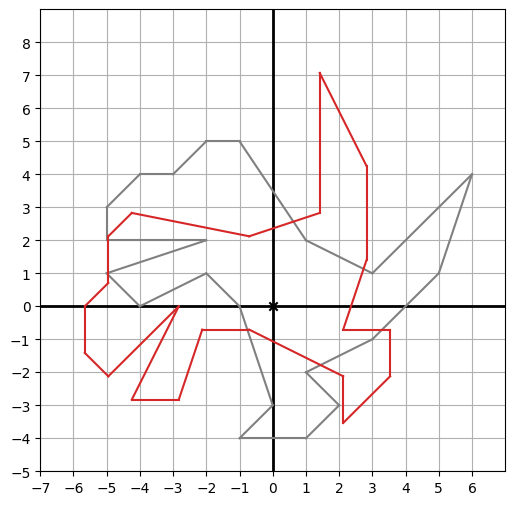

In [11]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

rotation_angle = pi/4

dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

**EXERCISE:** 위의 코드를 참고하여 `rotate(angle, vectors)` 함수를 만드시오. ```vectors```: 데카르트 좌표계로 표현된 2차원 벡터들, ```angle```: 회전할 각도(라디안). 

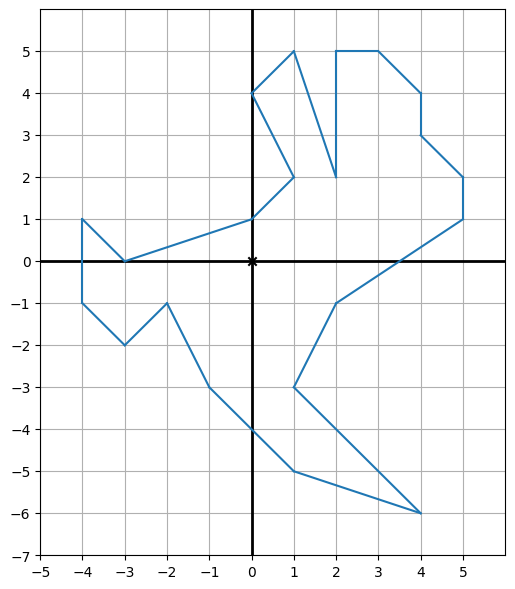

In [14]:
def rotate(angle, vectors):
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((l, a+angle)) for l,a in polars]

draw(
    Polygon(*rotate(-pi/2, dino_vectors))
)

## 벡터 변환의 결합

아래 코드에선 회전 후 평행 이동이 결합되어 있다. 코드를 수행해보고 결과에 대해 논의해보자.

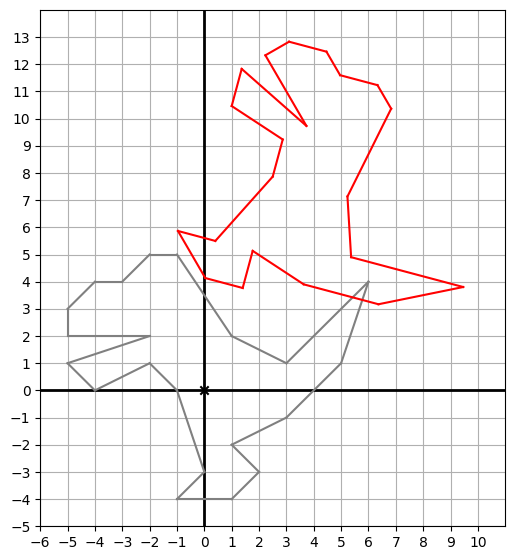

In [25]:
def add(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

def translate(translation, vectors):
    return [add(translation, v) for v in vectors]


new_dino = translate((3,7), rotate(5 * pi/3, dino_vectors))

draw(
    Polygon(*dino_vectors, color='grey'),
    Polygon(*new_dino, color='red')
)